In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [28]:
data=pd.read_csv('houses.csv')
data

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14059,14500000,1180,Mira Road,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9
14060,14500000,530,Naigaon,1,1,9,9,9,9,9,9,9,9,9,9,9,9,9
14061,4100000,700,Shirgaon,1,0,9,9,9,9,9,9,9,9,9,9,9,9,9
14062,2750000,995,Mira Road,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9


In [29]:
data.drop(data[data['Location'] == 'A'].index, inplace=True)

In [30]:
data.isnull().sum()

Price                 0
Area                  0
Location              0
No. of Bedrooms       0
New/Resale            0
Gymnasium             0
Lift Available        0
Car Parking           0
Maintenance Staff     0
24x7 Security         0
Children              0
Clubhouse             0
Intercom              0
Landscaped Gardens    0
Indoor Games          0
Gas Connection        0
Jogging Track         0
Swimming Pool         0
dtype: int64

In [31]:
data.shape

(14063, 18)

In [32]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Children', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14063 entries, 0 to 14063
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Price               14063 non-null  int64 
 1   Area                14063 non-null  int64 
 2   Location            14063 non-null  object
 3   No. of Bedrooms     14063 non-null  int64 
 4   New/Resale          14063 non-null  int64 
 5   Gymnasium           14063 non-null  int64 
 6   Lift Available      14063 non-null  int64 
 7   Car Parking         14063 non-null  int64 
 8   Maintenance Staff   14063 non-null  int64 
 9   24x7 Security       14063 non-null  int64 
 10  Children            14063 non-null  int64 
 11  Clubhouse           14063 non-null  int64 
 12  Intercom            14063 non-null  int64 
 13  Landscaped Gardens  14063 non-null  int64 
 14  Indoor Games        14063 non-null  int64 
 15  Gas Connection      14063 non-null  int64 
 16  Jogging Track       14063 n

In [34]:
data.dtypes

Price                  int64
Area                   int64
Location              object
No. of Bedrooms        int64
New/Resale             int64
Gymnasium              int64
Lift Available         int64
Car Parking            int64
Maintenance Staff      int64
24x7 Security          int64
Children               int64
Clubhouse              int64
Intercom               int64
Landscaped Gardens     int64
Indoor Games           int64
Gas Connection         int64
Jogging Track          int64
Swimming Pool          int64
dtype: object

In [35]:
data['Location'].nunique()

261

In [36]:
data['Location'].unique()

array(['Kharghar', 'Dombivali', 'Churchgate', 'Prabhadevi', 'Jogeshwari',
       'Kalyan', 'Malad', 'Virar', 'Borivali', 'Mira Road', 'Goregaon',
       'Kandivali', 'Andheri', 'Wadala', 'Ulwe', 'Dahisar', 'Bhandup',
       'Thakur Village', 'Santacruz', 'Kanjurmarg', 'I C Colony',
       'Dahisar W', 'Marol', 'Parel', 'Worli', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur', 'Diamond Market Road', 'Mulund',
       'Nalasopara', 'Raheja Vihar', 'Powai', 'Mhada Colony',
       'Tolaram Colony', 'Taloja', 'Thane', 'Vangani', 'Kamothe',
       'Navi Basti', 'Rutu Enclave', 'Azad Nagar',
       'Sindhi Society Chembur', 'Kurla', 'Sahkar Nagar', 'Deonar',
       'Jankalyan Nagar', 'Badlapur', 'Ambernath', 'Vakola',
       'Almeida Park', 'Khar', 'Bandra', 'Pali Hill', 'Road', 'Palghar',
       'Vivek Vidyalaya Marg', 'Vasai', 'Nahur', 'Panvel',
       'Mira Bhayandar', 'Juhu', 'Naigaon', 'Dronagiri', 'Nerul',
       'Karanjade', 'Sanpada', 'Ghodbunder Road', 'Bhiwandi', 'Dadar',


In [37]:
data=data[data['No. of Bedrooms']!=7]

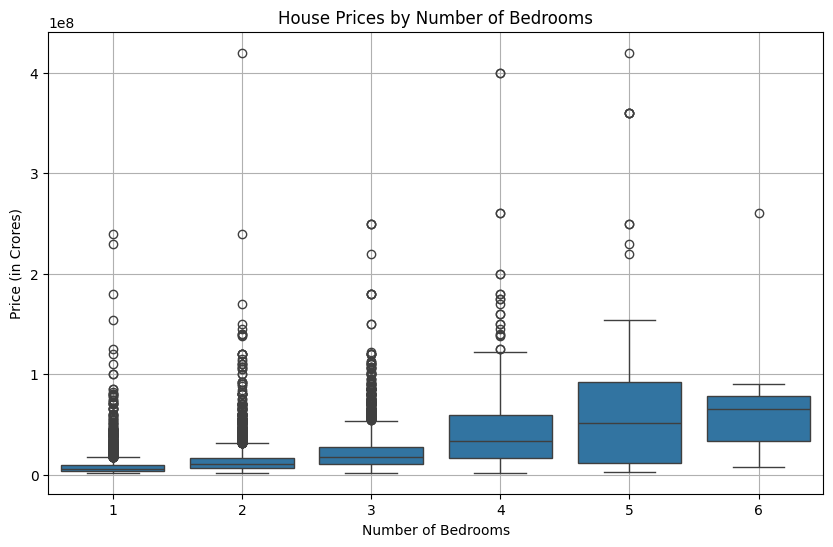

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='No. of Bedrooms', y='Price', data=data)
plt.title('House Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in Crores)')
plt.grid(True)
plt.show()


In [39]:
data_1_bhk = data[data['No. of Bedrooms'] == 1]
data_2_bhk = data[data['No. of Bedrooms'] == 2]
data_3_bhk = data[data['No. of Bedrooms'] == 3]
data_4_bhk = data[data['No. of Bedrooms'] == 4]
data_5_bhk = data[data['No. of Bedrooms'] == 5]
data_6_bhk = data[data['No. of Bedrooms'] == 6]

In [40]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Children', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool'],
      dtype='object')

In [41]:
data['Price_per_sqft'] = data['Price']/data['Area']

In [42]:
data.duplicated().sum()

841

In [43]:
data.drop_duplicates(inplace=True)

In [44]:
data.duplicated().sum()

0

In [45]:
corr_df=data[['Price', 'Area','No. of Bedrooms', 'New/Resale','Price_per_sqft']]

In [46]:
corr_df.dtypes

Price                int64
Area                 int64
No. of Bedrooms      int64
New/Resale           int64
Price_per_sqft     float64
dtype: object

<Axes: >

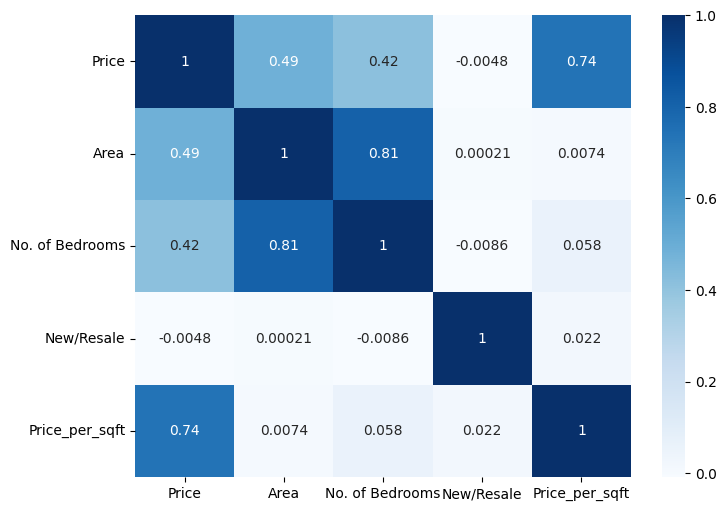

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(),cmap='Blues',annot=True)

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data=data.copy()
house_data['Location']= label_encoder.fit_transform(house_data['Location'])
house_data

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft
0,4850000,720,103,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,4500000,600,103,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,6700000,650,103,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,4500000,650,103,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,5000000,665,103,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14059,14500000,1180,137,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9,12288.135593
14060,14500000,530,142,1,1,9,9,9,9,9,9,9,9,9,9,9,9,9,27358.490566
14061,4100000,700,206,1,0,9,9,9,9,9,9,9,9,9,9,9,9,9,5857.142857
14062,2750000,995,137,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9,2763.819095


In [49]:
def removeOutliners(data):
  df_Out = pd.DataFrame()
  for key,subdf in data.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out
house_data = removeOutliners(house_data)
house_data.shape

(11553, 19)

In [50]:
from sklearn.model_selection import train_test_split
X=house_data.drop(columns=['Price'],axis=1)
y=house_data['Price']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8087, 18) (3466, 18)
(8087,) (3466,)


In [52]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LR_prediction=lr_clf.predict(X_test)
print('Precision :',r2_score(LR_prediction,y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,y_test))
print('MSE:',mean_squared_error(LR_prediction,y_test))
rmse = sqrt(mean_squared_error(LR_prediction,y_test))
print('RMSE:',rmse)

Precision : 71.73054732952676
MAE: 2852242.8246455723
MSE: 52668482609230.07
RMSE: 7257305.464787194


In [53]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

DT_prediction=DT.predict(X_test)
print('Precision :',r2_score(DT_prediction,y_test)*100)
print('MAE:',mean_absolute_error(DT_prediction,y_test))
print('MSE:',mean_squared_error(DT_prediction,y_test))

Precision : 83.8673146267018
MAE: 596285.0585689555
MSE: 33718519580577.645


In [54]:
RF=RandomForestRegressor(random_state=1,n_estimators=50,max_depth=100)
RF.fit(X_train,y_train)

RF_prediction=RF.predict(X_test)
print('Precision :',r2_score(RF_prediction,y_test)*100)
print('MAE:',mean_absolute_error(RF_prediction,y_test))
print('MSE:',mean_squared_error(RF_prediction,y_test))

Precision : 85.2974041975841
MAE: 355007.1412983266
MSE: 30401395545119.79


In [55]:
def format_price(predicted_price):
    if predicted_price >= 10000000:  # If price is 7 digits or more (Crore)
        formatted_price = "{:.2f} Cr ₹".format(predicted_price / 10000000)
    else:  # If price is less than 7 digits (Lakh)
        formatted_price = "{:.2f} L ₹".format(predicted_price / 100000)
    
    return formatted_price

In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

input_location = input("Enter a location name from the available locations: ")
input_bedrooms = int(input("Enter the number of bedrooms (maximum 6): "))

# Check if the number of bedrooms exceeds 6
if input_bedrooms > 6:
    print("Houses with more than 6 bedrooms are currently not available.")
else:
    # Label encode the input location
    input_location_encoded = label_encoder.fit_transform([input_location])[0]

    # Filter DataFrame to get the rows corresponding to the input_location and input_bedrooms
    location_bedroom_rows = data[(data['Location'] == input_location) & (data['No. of Bedrooms'] == input_bedrooms)]

    if not location_bedroom_rows.empty:
        # Extract features for prediction
        features = location_bedroom_rows.drop(columns=['Price'], errors='ignore')

        # Add 'Location' feature with label encoded value
        features['Location'] = input_location_encoded

        # Ensure 'price_per_sqft' is present in the features DataFrame
        if 'Price_per_sqft' not in features.columns:
            print("Price_per_sqft feature is missing. Please ensure it is included.")
        else:
            # Predict house price for the input location and input_bedrooms
            predicted_price = RF.predict(features)

            # Format the predicted price
            formatted_price = format_price(predicted_price[0])

            # Display predicted price
            print(f"The predicted price for a {input_bedrooms}-bedroom house in {input_location} is: {formatted_price}")
    else:
        print(f"No data available for a {input_bedrooms}-bedroom house in {input_location}.")

The predicted price for a 2-bedroom house in Ghatkopar is: 1.20 Cr ₹


In [57]:
# import joblib
# joblib.dump(RF,'model.pkl')